# 1. 강의영상 

{{<video https://youtu.be/playlist?list=PLQqh36zP38-zMB0zUn5uWT722eagWFDG3&si=vU6BMNkqwL0VM5Sx >}}

# 2. Imports 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation
import IPython
import sklearn.tree
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data

In [2]:
np.random.seed(43052)
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:,3].to_numpy()[:100]
temp.sort()
eps = np.random.randn(100)*3 # 오차
icecream_sales = 20 + temp * 2.5 + eps 
df_train = pd.DataFrame({'temp':temp,'sales':icecream_sales})
df_train

,temp,sales
0,-4.1,10.900261
1,-3.7,14.002524
2,-3.0,15.928335
3,-1.3,17.673681
4,-0.5,19.463362
...,...,...
95,12.4,54.926065
96,13.4,54.716129
97,14.7,56.194791
98,15.0,60.666163


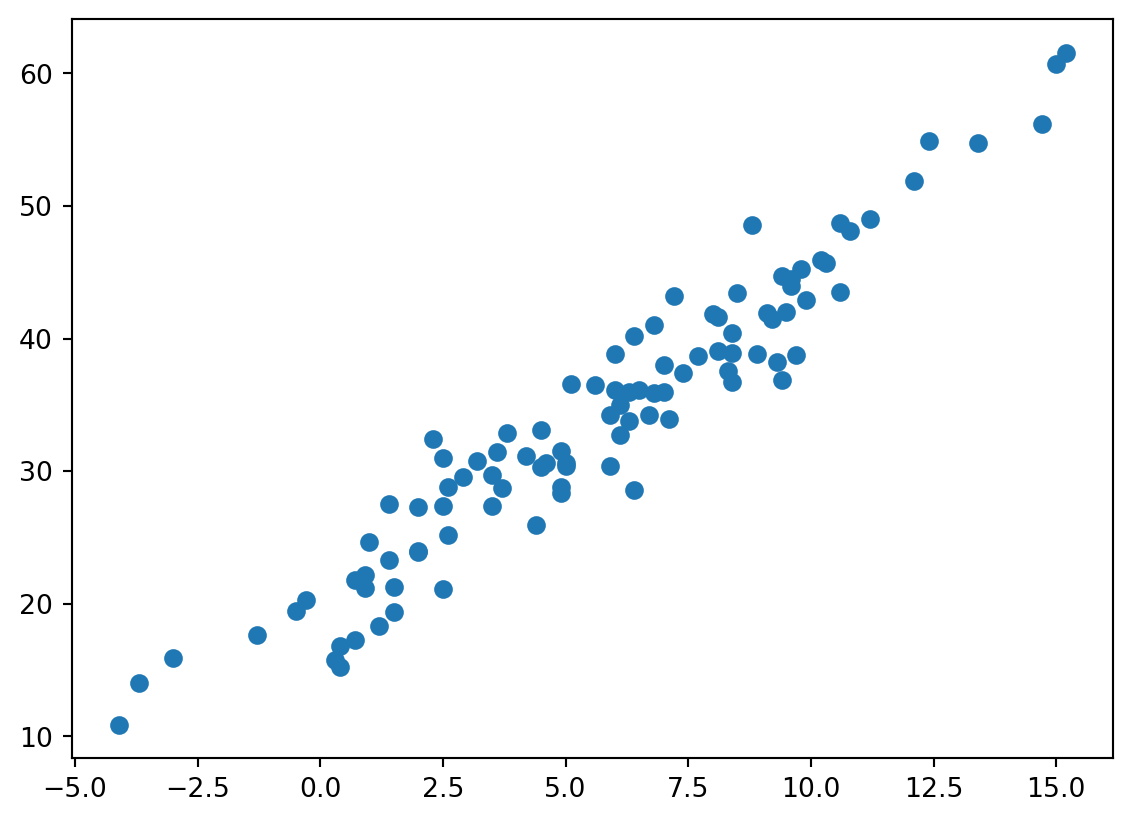

In [3]:
plt.plot(df_train.temp,df_train.sales,'o')

# 4. `DecisionTreeRegressor` (`max_depth`)

## A. `max_depth`=1

`-` step1~4

In [4]:
## step1
X = df_train[['temp']]
y = df_train['sales']
## step2
predictr = sklearn.tree.DecisionTreeRegressor(max_depth=1) 
## step3 
predictr.fit(X,y) 
## step4 -- pass 
# predictr.predict(X) 

DecisionTreeRegressor(max_depth=1)

`-` 결과 시각화 

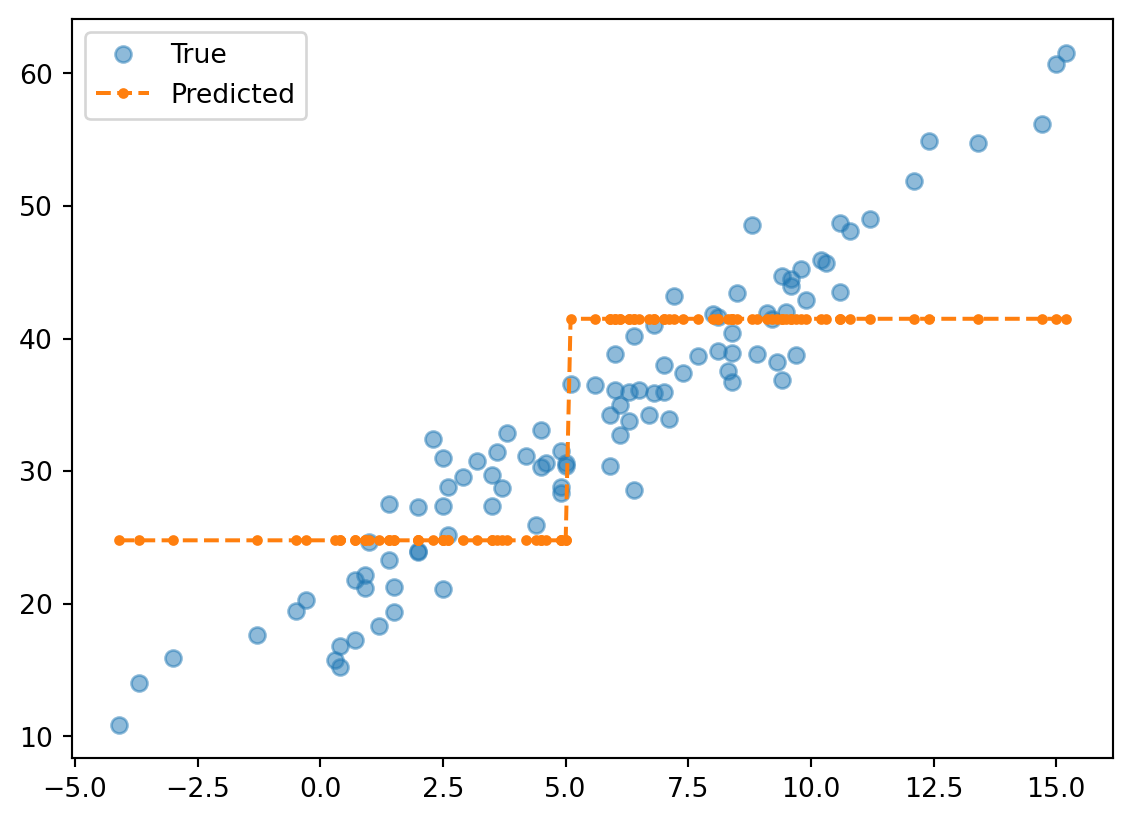

In [5]:
plt.plot(X,y,'o',alpha=0.5,label='True')
plt.plot(X,predictr.predict(X),'--.',label='Predicted')
plt.legend()

`-` tree 시각화

[Text(0.5, 0.75, 'x[0] <= 5.05\nsquared_error = 111.946\nsamples = 100\nvalue = 33.973'),
 Text(0.25, 0.25, 'squared_error = 34.94\nsamples = 45\nvalue = 24.788'),
 Text(0.75, 0.25, 'squared_error = 49.428\nsamples = 55\nvalue = 41.489')]

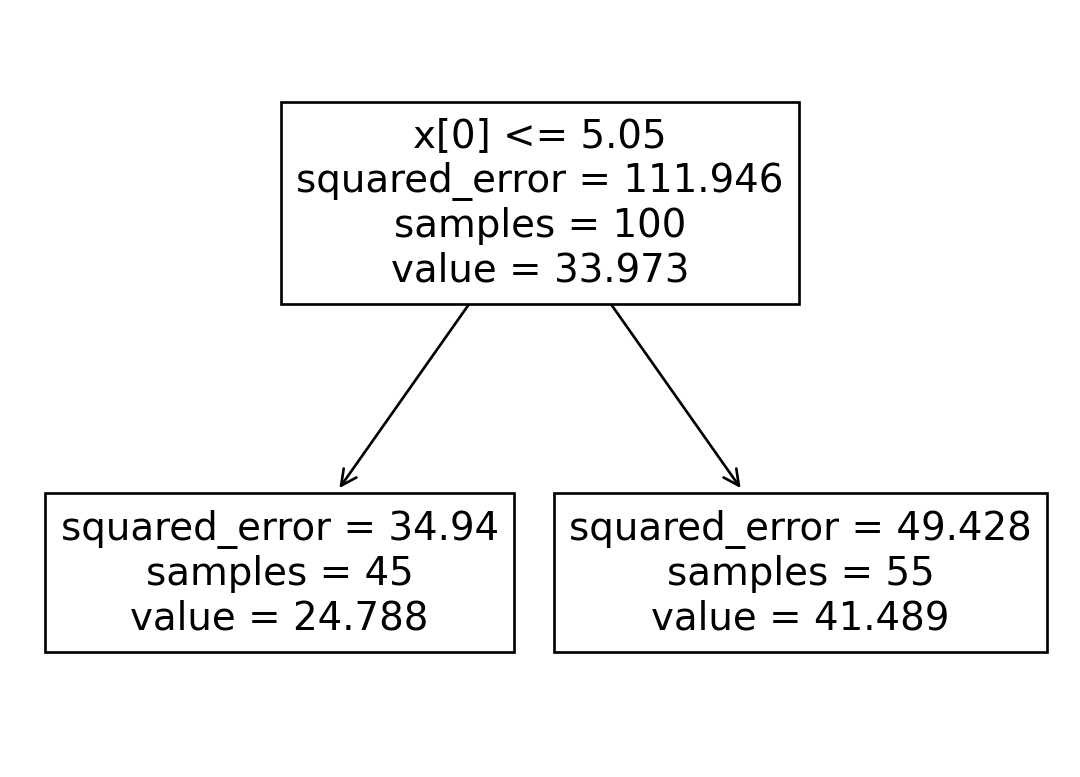

In [6]:
sklearn.tree.plot_tree(predictr)

## B. `max_depth`=2

`-` step1~4

In [7]:
## step1
X = df_train[['temp']]
y = df_train['sales']
## step2
predictr = sklearn.tree.DecisionTreeRegressor(max_depth=2) 
## step3 
predictr.fit(X,y) 
## step4 -- pass 
# predictr.predict(X) 

DecisionTreeRegressor(max_depth=2)

`-` 결과 시각화 

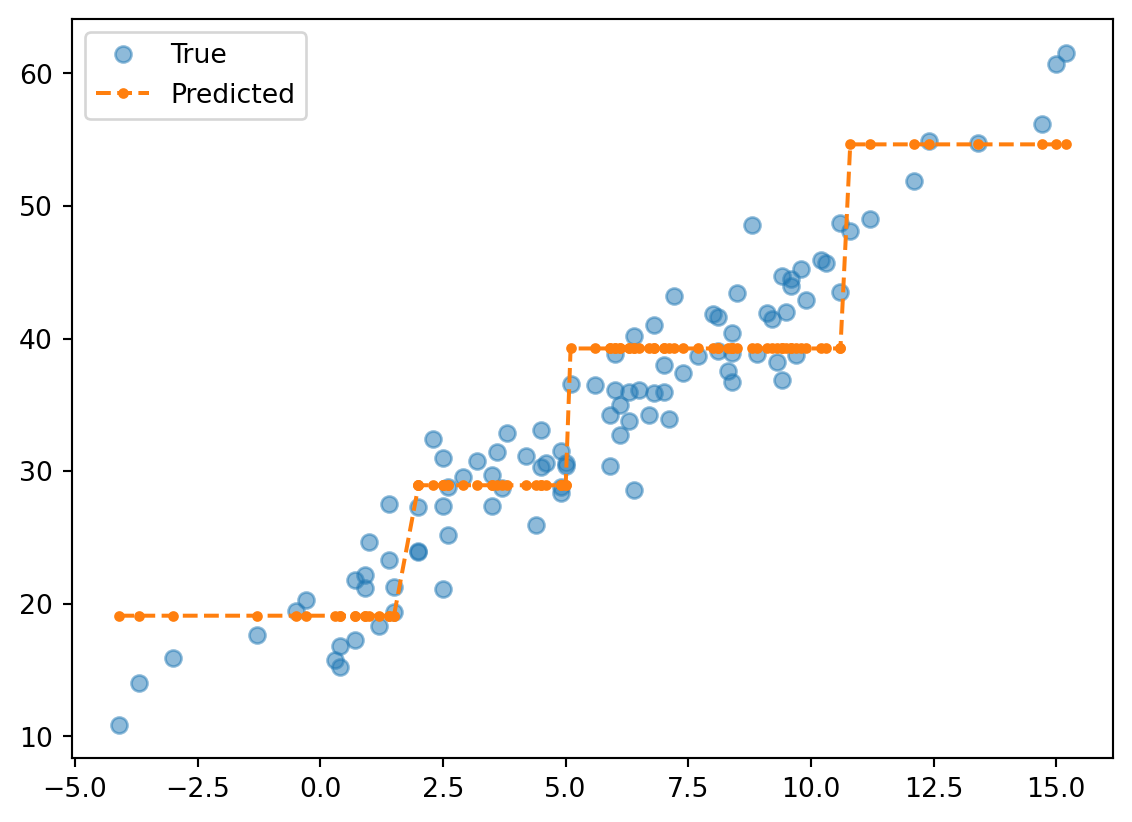

In [8]:
plt.plot(X,y,'o',alpha=0.5,label='True')
plt.plot(X,predictr.predict(X),'.--',label='Predicted')
plt.legend()

`-` tree 시각화

[Text(0.5, 0.8333333333333334, 'x[0] <= 5.05\nsquared_error = 111.946\nsamples = 100\nvalue = 33.973'),
 Text(0.25, 0.5, 'x[0] <= 1.75\nsquared_error = 34.94\nsamples = 45\nvalue = 24.788'),
 Text(0.125, 0.16666666666666666, 'squared_error = 15.12\nsamples = 19\nvalue = 19.105'),
 Text(0.375, 0.16666666666666666, 'squared_error = 8.587\nsamples = 26\nvalue = 28.94'),
 Text(0.75, 0.5, 'x[0] <= 10.7\nsquared_error = 49.428\nsamples = 55\nvalue = 41.489'),
 Text(0.625, 0.16666666666666666, 'squared_error = 19.819\nsamples = 47\nvalue = 39.251'),
 Text(0.875, 0.16666666666666666, 'squared_error = 21.051\nsamples = 8\nvalue = 54.638')]

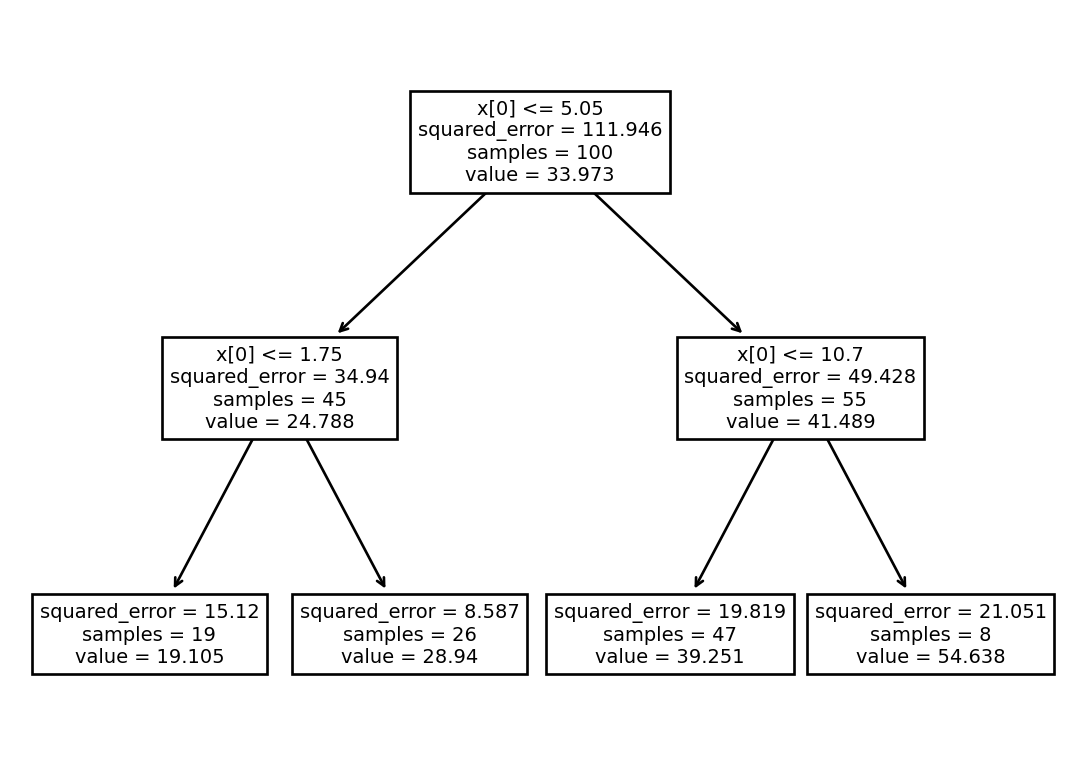

In [9]:
sklearn.tree.plot_tree(predictr)

## C. 애니메이션

`-` step1~4

In [10]:
## step1 
X = df_train[['temp']]
y = df_train['sales']
## step2
predictrs = [sklearn.tree.DecisionTreeRegressor(max_depth=k) for k in range(1,11)]
## step3 
for k in range(10):
    predictrs[k].fit(X,y)
## step4 -- pass

`-` 애니메이션 

In [11]:
fig = plt.figure()

<Figure size 672x480 with 0 Axes>

In [12]:
def func(frame):
    ax = fig.gca()
    ax.clear()
    ax.plot(X,y,'o',alpha=0.5) 
    ax.plot(X,predictrs[frame].predict(X),'.--') 
    ax.set_title(f'max_depth={predictrs[frame].max_depth}')

In [13]:
ani = matplotlib.animation.FuncAnimation(
    fig,
    func,
    frames=10
)

In [14]:
display(IPython.display.HTML(ani.to_jshtml()))